In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
 
    
# https://colab.research.google.com/drive/18r_YPXkOUKe7DIiC74d9Ji5-7Aj-8xIj?usp=sharing#scrollTo=Kxs6z4Qy2ms3   
#https://colab.research.google.com/drive/1n16BZruMw9OV-efIpIJa6OwtgYNiyKmX

class retirement_plan:
    """
    A retirement plan. 
    """
 
    def __init__(self, balance_start = 70000, salary_start = 150000, salary_retired = 80000, salary_growth = 0.02, 
                inflation = 0.025, annual_return = 0.06, savings_rate = 0.23, age_start = 41, age_retirement = 67, mute=True):
        """
        Initializes the retirement plan with the following parameters:
         
        balance_start: starting balance in dollars (default = $70,000)
        salary_start: gross salary in dollars per year (default = $150,000)
        salary_retired: yearly withdrawal AFTER Social Security, in current dollars (default = $80,000)
        salary_growth: percentage annual salary raise (default = 0.025)     
        inflation: percentage inflation (default = 0.025)     
        savings_rate: percentage of yearly gross salary going to savings (default =0.23)     
        age_start: starting age in years (default = 41) 
        age_retirement: age starting retirement in years (default = 67)
        annual_return: percentage annual return on investments (default = 0.06)
        mute: switch off (False) for printing output (default = True (muted))
        """
        self.balance_start = balance_start
        self.salary_start = salary_start
        self.salary_retired = salary_retired
        self.salary_growth = salary_growth
        self.inflation = inflation
        self.annual_return = annual_return
        self.savings_rate = savings_rate
        self.age_start = age_start
        self.age_retirement = age_retirement
        self.mute = mute

    def calculate(self): 
        self.age_list = []
        self.balance_list = []
        self.salary_list = []
        age = self.age_start
        balance = self.balance_start
        salary = self.salary_start
        salary_retired = self.salary_retired
        if not self.mute:
            print("age", "balance", "salary", "salary_retired")
 
        # Accumulation Phase:
        while age < self.age_retirement:
            # Values at the start of the year
            if not self.mute:
                print(age, round(balance), round(salary), round(salary_retired))
            self.age_list.append(age)
            self.balance_list.append(round(balance))
            self.salary_list.append(round(salary))
 
            #Yearly savings and return on investment, compounding monthly
            yearly_savings = self.savings_rate*salary
            for month in range(12):
                balance += yearly_savings/12.
                balance *= (1+self.annual_return)**(1./12)
     
            # Salary raise and inflation correction at the end of the year
            salary += salary*self.salary_growth
            salary_retired += salary_retired*self.inflation 
 
            # Turn older at the end of the year
            age += 1
 
        # Retirement Phase:
        while (balance > 0) & (age < 121):
            # Values at the start of the year
            salary = round(salary_retired)
            balance -= salary      
            if not self.mute:
                print(age, round(balance), round(salary), round(salary_retired))
         
            self.age_list.append(age)                  
            self.balance_list.append(round(balance))
            self.salary_list.append(salary)
 
            #Yearly return on investment, compounding monthly
            for month in range(12):
                balance *= (1+self.annual_return)**(1./12)
 
            # Salary inflation correction at the end of the year
            salary_retired += salary_retired*self.inflation
 
            # Turn older at the end of the year
            age += 1   
            
        self.age_zero = self.age_list[-1]
    
    def summary(self):
        age_index = self.age_list.index(self.age_retirement)
        print("Balance at retirement: ${0:.0f}".format(self.balance_list[age_index]))
        print("Salary at retirement: ${0:.0f}".format(self.salary_list[age_index]))
        print("Starting withdrawal is {0:.1f}% of savings".format(100.*self.salary_list[age_index]/self.balance_list[age_index])) 
        if self.age_zero == 120:
            print("You'll never run out of money!")
        else:
            print("You'll run out of money when you are:", self.age_zero)
 
    def plot(self):
        age_index = self.age_list.index(self.age_retirement)
        fig, (ax1, ax2) = plt.subplots(2, sharex=False, figsize=(12,12))
        ax1.plot(self.age_list,self.balance_list)
        ax2.plot(self.age_list,self.salary_list)
        ax1.set_title('Savings vs Age')
        ax2.set_title('Income vs Age')
        ax1.set_ylabel('Total Savings')
        ax2.set_ylabel('Income')
        fmt = '${x:,.0f}'
        tick = mtick.StrMethodFormatter(fmt)
        ax1.yaxis.set_major_formatter(tick) 
        ax2.yaxis.set_major_formatter(tick) 
        ax1.tick_params(axis='both', which='major', labelsize=16)    
        ax2.tick_params(axis='both', which='major', labelsize=16)    
        ax1.grid(True)
        ax2.grid(True)
        plt.xlabel('Age')
        for ax in [ax1, ax2]:
            ax.axvline(x=self.age_retirement, linestyle = '--', color='blue')
            if self.age_zero < 120:
                ax.axvline(x=self.age_zero, linestyle = '--', color='red')
        ax1.text(self.age_retirement, 0.85*self.balance_list[age_index], 'Retirement at '+str(self.age_retirement), 
                 horizontalalignment='center', fontsize=12, bbox=dict(boxstyle = "square", facecolor = "white"))
        if self.age_zero < 120:
          ax1.text(self.age_zero, 0.15*self.balance_list[age_index], 'Out of money at '+str(self.age_zero), 
                 horizontalalignment='center', fontsize=12, bbox=dict(boxstyle = "square", facecolor = "white"))
        #plt.savefig('retirement_plan.png', bbox_inches = 'tight')


Balance at retirement: $2093639
Salary at retirement: $142754
Starting withdrawal is 6.8% of savings
You'll run out of money when you are: 97


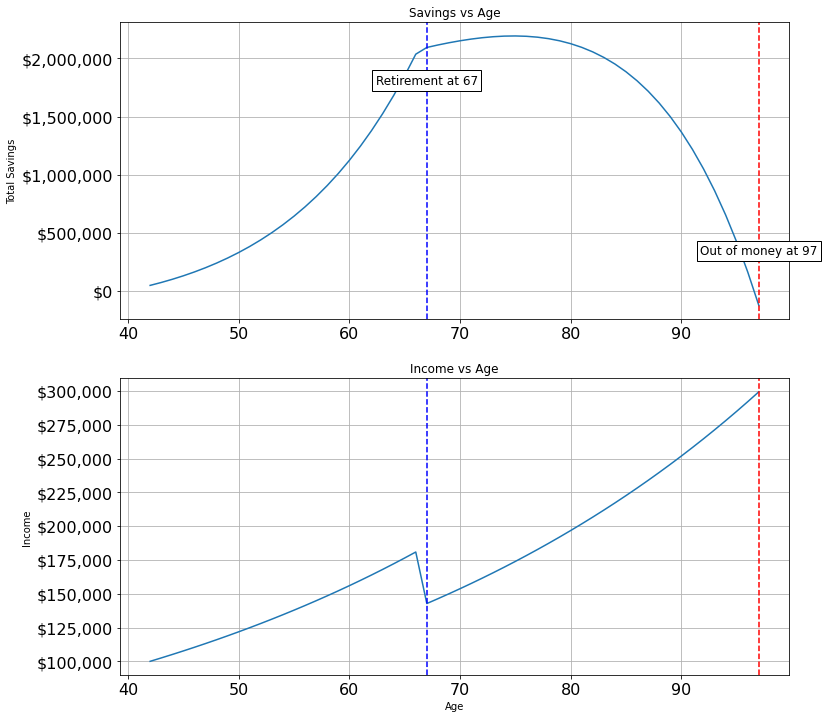

In [2]:
#-----------------------------------------
# ADD YOUR INPUT HERE, THEN RUN THIS CELL:
#-----------------------------------------
balance_start = 50000   # starting balance 
age_start = 42          # starting age in years
age_retirement = 67     # age starting retirement in years
savings_rate = 0.2      # fraction of yearly gross salary going to savings
salary_start = 100000   # gross yearly salary 
salary_retired = 77000  # yearly withdrawal AFTER Social Security and other benefits (not corrected for inflation)
salary_growth = 0.025   # percentage annual salary raise (in decimal notation) 
inflation = 0.025       # percentage inflation (in decimal notation) 
annual_return = 0.08    # percentage annual return on your investments (in decimal notation)
#-----------------------------------------

plan = retirement_plan(balance_start = balance_start, age_start = age_start, 
                       age_retirement = age_retirement, savings_rate = savings_rate, 
                       salary_start = salary_start, salary_retired = salary_retired, 
                       salary_growth = salary_growth, inflation = inflation, 
                       annual_return = annual_return)
plan.calculate()
plan.summary()
plan.plot()

/tmp/ipykernel_4/1993865872.py:26: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu").copy()
  CS.cmap.set_under('red')
/tmp/ipykernel_4/1993865872.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("RdBu").copy()
  CS.cmap.set_over('blue')


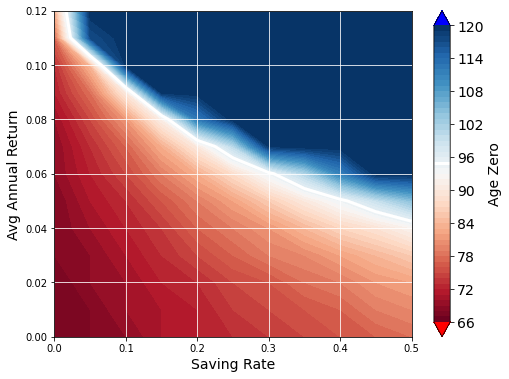

In [3]:
#Your simulation is shown above. If you like, you can also play with the 2-dimensional simulation for multiple saving rates and annual returns by executing the cell below:
# Annual returns range from 0 to 0.12 in steps of 0.01
annual_returns = np.arange(0.0, 0.13,0.01)
# Saving rates range from 0 to 0.5 in steps of 0.05
saving_rates = np.arange(0.0, 0.55,0.05)
age_levels = np.arange(66,121,1)
ages = np.zeros((len(annual_returns), len(saving_rates)))
 
# Run the simulation for every combination of Annual Return 
# and Saving Rate
for i in range(len(saving_rates)):
    sav_rate = saving_rates[i]
    for j in range(len(annual_returns)):
        annual_return = annual_returns[j]
        plan = retirement_plan(savings_rate = sav_rate, 
                               salary_start = salary_start, salary_retired = salary_retired, 
                               salary_growth = salary_growth, inflation = inflation, 
                               annual_return = annual_return)
        plan.calculate()
        # Storing Age Zero
        ages[j,i] = plan.age_zero
     
# Filled contour plotting        
fig, ax = plt.subplots(figsize = (8,6)) 
CS = ax.contourf(saving_rates, annual_returns, ages, age_levels, extend='both', cmap = 'RdBu') 
CS.cmap.set_under('red')
CS.cmap.set_over('blue')
ax.set_xlabel('Saving Rate', fontsize = 14)
ax.set_ylabel('Avg Annual Return', fontsize = 14)
CS3 = ax.contour(saving_rates, annual_returns, ages, [95], colors=('w',), linewidths = (3))
ax.grid(True, color='w')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Age Zero', fontsize = 14)
cbar.ax.tick_params(axis='both', which='major', labelsize=14)    
cbar.add_lines(CS3)